In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

from halocarbons_loader import HATS_Loader
from halocarbons_figures import HATS_figures

hats = HATS_Loader()
figs = HATS_figures()

In [2]:
df = hats.loader('f11', gapfill=True)

Loading data for F11
File URL: ftp://ftp.cmdl.noaa.gov/hats/cfcs/cfc11/flasks/GCMS/CFC11b_GCMS_flask.txt
Please consult the header in the file listed above for PI and contact information.
seasonal gapfill started
gapfiller took 15.2 seconds


In [3]:
df.head()

mf      sd  model       gf    gfsd  forecast      lat  \
site date                                                                     
alt  2010-04-01  240.780  0.3400    NaN  240.780  0.3400       NaN  82.4508   
     2010-05-01  241.050  0.3575    NaN  241.050  0.3575       NaN  82.4508   
     2010-06-01  240.670  0.2275    NaN  240.670  0.2275       NaN  82.4508   
     2010-07-01  239.495  0.4150    NaN  239.495  0.4150       NaN  82.4508   
     2010-08-01  239.425  0.2525    NaN  239.425  0.2525       NaN  82.4508   

                     lon   elev  
site date                        
alt  2010-04-01 -62.5072  185.0  
     2010-05-01 -62.5072  185.0  
     2010-06-01 -62.5072  185.0  
     2010-07-01 -62.5072  185.0  
     2010-08-01 -62.5072  185.0

Text(0, 0.5, 'ppt')

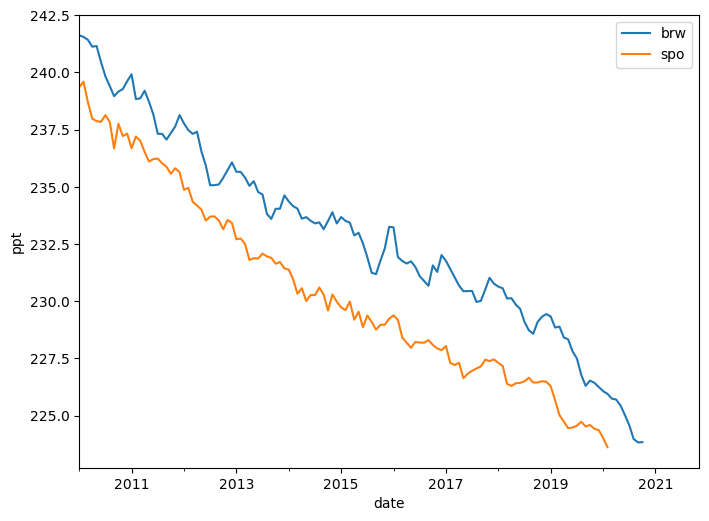

In [4]:
df['gf']['brw'].plot(label='brw')
df['gf']['spo'].plot(label='spo')
plt.legend()
plt.ylabel('ppt')

<AxesSubplot:xlabel='date'>

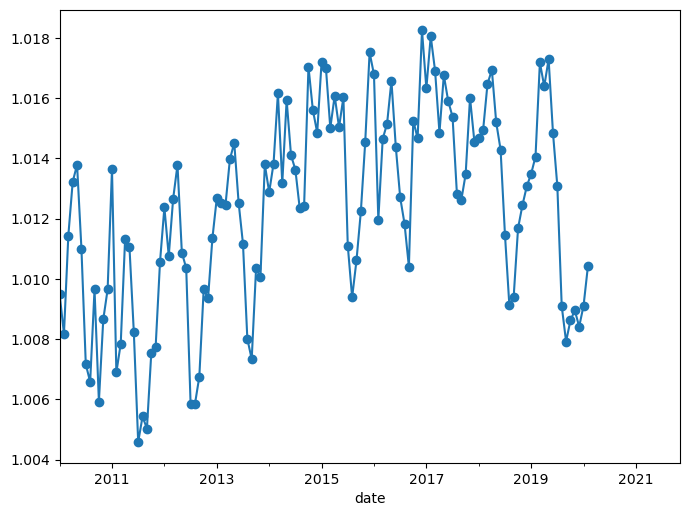

In [5]:
(df['gf']['brw'] / df['gf']['spo']).plot(marker='o')

In [6]:
sites = df.reset_index()['site'].unique()
sites

array(['alt', 'brw', 'cgo', 'hfm', 'kum', 'lef', 'mhd', 'mlo', 'nwr',
       'psa', 'smo', 'spo', 'sum', 'thd'], dtype=object)

Text(0, 0.5, 'ppt')

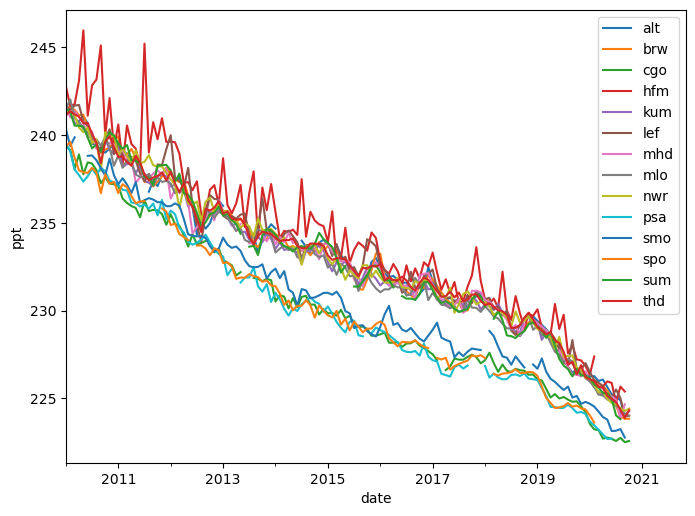

In [7]:
for site in sites:
    df['mf'][site].plot(label=site)
plt.legend()
plt.ylabel('ppt')

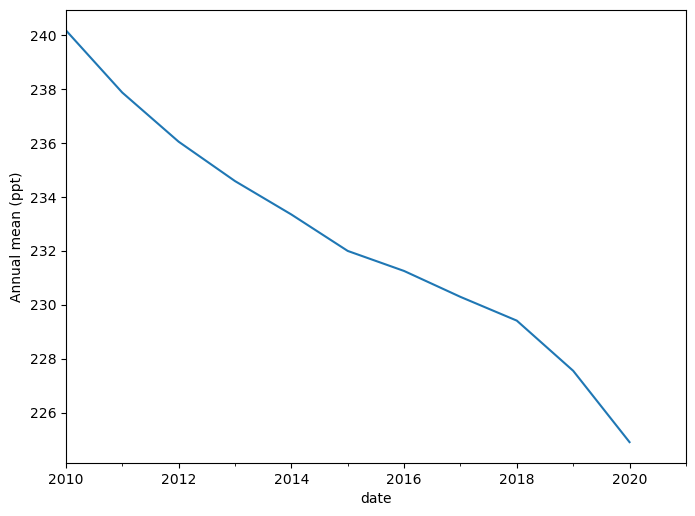

In [8]:
df['mf']['mlo'].resample('A').mean().plot()
l = plt.ylabel('Annual mean (ppt)')

In [6]:
display(figs.multi_station_figure(df))

None